In [2]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk
nltk.download('stopwords')# preprocessing text
nltk.download('wordnet')
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import the reviews file

In [3]:
import pandas as pd
reviews_dataset = pd.read_csv('csv/foodonreviews.csv')
reviews_dataset.drop('Unnamed: 0',axis=1,inplace= True)

In [4]:
reviews_dataset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,category9,category10,review_id,user_id,stars_y,date,text,useful,funny,cool
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,5,2016-06-05,It's sad to read all these shallow reviews of ...,2,0,0
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,5,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,5,2015-04-05,"This place is absolutely awesome.\n\nCheap, go...",1,2,0
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,5,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438279,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,NaN,NaN,2Dg_RzFDkPQBnbdwzzjmMg,f6vsIAG-k4R3_oUgtHtazQ,4,2016-10-19,Ordered the pumpkin pie for thanksgiving and i...,2,0,0
438280,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,Pz2I9INhJGqPaSvPPmr79g,N6QHZume4KDbcfR5_ue5zA,1,2011-11-27,"One word, horrible! Just because I don't speak...",0,0,0
438281,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,ykL_MhYpraYt3TkJaOPeaw,RrLRd9M2Q6iYCNnKMZsdtw,4,2011-10-14,"Tiny little restaurant at Dundas and Sheridan,...",2,1,2
438282,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,zCJjY733RZPnwK4mn1s9xQ,F3MUcn2wx84vK6Or2Es-wg,3,2011-11-12,Went here for dinner last night. Portions were...,0,0,1


In [5]:
# reviews_dataset.shape[0] - gives number of row count
print("Total No. of Reviews: {}".format(reviews_dataset.shape[0]))

Total No. of Reviews: 438284


In [6]:
reviews_dataset.shape

(438284, 30)

In [7]:
sample_review = reviews_dataset.text[28]

In [8]:
reviews_dataset.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'review_id', 'user_id', 'stars_y', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

### Frequency of each star ratings

In [9]:
reviews_dataset["stars_y"].value_counts()

4    144389
5    123975
3     81017
2     45104
1     43799
Name: stars_y, dtype: int64

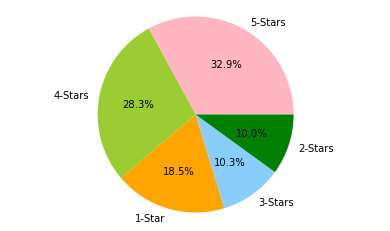

In [10]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["stars_y"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [11]:
from tqdm import tqdm_notebook as tqdm

### Porter Stemmer

In [13]:

class PorterStemmer2:
    def isVowel(self,letter):
        vowels = ['a','e','i','o','u','y']
        if letter in vowels:
            return True
        else:
            return False
    def isDouble(self,seq):
        doubles = ['bb','dd','ff','gg','mm','nn','pp','rr','tt']
        if seq in doubles:
            return True
        else:
            return False
    def isLiEnd(self,letter):
        li = ['c','d','e','g','h','k','m','n','r','t']
        if letter in li:
            return True
        else:
            return False
    def getR1(self,word):
        R1 = ""
        for i in range(len(word)):
            if not self.isVowel(word[i]):
                if i > 0 and self.isVowel(word[i-1]):
                    R1 = word[i+1:]
                    break
        return R1
    def getR2(self,word):
        R1 = self.getR1(word)
        R2 = self.getR1(R1)
        return R2
    def hasShortSyllable(self,word):
        checkIn = ['w','x','Y']
        for i in range(len(word)):
            if self.isVowel(word[i]):
                if i==0 and i+1<len(word):
                    if not self.isVowel(word[i+1]):
                        return True
                elif i>0 and i<len(word)-1:
                    if not self.isVowel(word[i-1]) and not self.isVowel(word[i+1]):
                        if word[i+1] not in checkIn:
                            return True
                else:
                    pass
        return False
        
    def isShort(self,word):
        r1 = self.getR1(word)
        if r1 == "":
            if len(word) >=3:
                if self.hasShortSyllable(word[len(word)-3:]):
                    return True
                else:
                    return False
            else:
                if self.hasShortSyllable(word[len(word)-2:]):
                    return True
                else:
                    return False 
        else:
            return False
    def markVowelasCons(self,word):
        out = list(word)
        for i in range(len(word)):
            if i == 0  and out[i] == 'y':
                out[i] = 'Y'
            elif i>0 and out[i] == 'y' and self.isVowel(out[i-1]):
                out[i] = 'Y'
            else:
                continue
        return ''.join(out)

    def removeList(self,i,l,wlist):
        while i < l:
            wlist.pop(i)
            l-=1
            
    def endsWith(self,word,suffix):
        if len(word) >= len(suffix):
            if word[len(word)-len(suffix):] == suffix:
                return True
            else:
                return False
        else:
            return False
        
    def step0(self,wordlist):
        l = len(wordlist)
        i = l-3
        while i < l:
            if wordlist[i] == '\'':
                if i == l-1:
                    wordlist.pop(i)
                    l-=1
                else:
                    if wordlist[i+1] == 's':
                        wordlist.pop(i+1)
                        wordlist.pop(i)
                        l-=2
            else:
                i+=1

    def step1a(self,wlist):
        temp = "".join(wlist)
        l = len(wlist)
        if self.endsWith(temp,"sses"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(temp,"ied") or self.endsWith(temp,"ies"):
            i = len(wlist)-2
            if l <= 4:
                i+=1
            self.removeList(i,l,wlist)
        elif self.endsWith(temp,"ss") or self.endsWith(temp,"us"):
            pass
        elif temp[-1] == 's':
            r = 0
            for i in range(len(wlist)-2):
                if self.isVowel(wlist[i]):
                    r = 1
            if r == 1:
                wlist.pop(len(wlist)-1)
        else:
            pass
        
    def checkAfter1b(self,wlist):
        word = "".join(wlist)
        last2 = word[len(word)-2:]
        if last2 == "at" or last2 == "bl" or last2 == "iz":
            wlist.append('e')
        elif self.isDouble(last2):
            wlist.pop()
        elif self.isShort(word):
            wlist.append('e')
        else:
            pass
    
    def hasVowel(self,prefix):
        for i in range(len(prefix)):
            if self.isVowel(prefix[i]):
                return True
        return False
    def step1b(self,wlist):
        word = "".join(wlist)
        r1 = self.getR1(word)
        i = len(wlist)
        l = len(wlist)
        if self.endsWith(r1,"eed"):
            self.removeList(i-1,l,wlist)
        elif self.endsWith(r1,"eedly"):
            self.removeList(i-3,l,wlist)
        elif self.endsWith(word,"ed") and self.hasVowel(word[:l-2]):
            self.removeList(i-2,l,wlist)
            self.checkAfter1b(wlist)
        elif self.endsWith(word,"edly") and self.hasVowel(word[:l-4]):
            self.removeList(i-4,l,wlist)
            self.checkAfter1b(wlist)
        elif self.endsWith(word,"ing") and self.hasVowel(word[:l-3]):
            self.removeList(i-3,l,wlist)
            self.checkAfter1b(wlist)
        elif self.endsWith(word,"ingly") and self.hasVowel(word[:l-5]):
            self.removeList(i-5,l,wlist)
            self.checkAfter1b(wlist)
        else:
            pass

    def step1c(self,wlist):
        if len(wlist) > 2:
            for i in range(2,len(wlist)):
                if wlist[i] == 'y' or wlist[i] == "Y":
                    if not self.isVowel(wlist[i-1]):
                        wlist[i] = 'i'
                    else:
                        pass
                else:
                    pass
        else:
            pass
        
                
                
    def step2(self,wlist):
        word = "".join(wlist)
        r1 = self.getR1(word)
        l = len(wlist)
        if self.endsWith(r1,"tional"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r1,"enci"):
            wlist[l-1] = 'e'
        elif self.endsWith(r1,"anci"):
            wlist[l-1] = 'e'
        elif self.endsWith(r1,"abli"):
            wlist[l-1] = 'e'
        elif self.endsWith(r1,"entli"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r1,"izer"):
            self.removeList(l-1,l,wlist)
        elif self.endsWith(r1,"ization"):
            self.removeList(l-5,l,wlist)
            wlist.append('e')
        elif self.endsWith(r1,"ational"):
            self.removeList(l-5,l,wlist)
            wlist.append('e')
        elif self.endsWith(r1,"ation"):
            self.removeList(l-3,l,wlist)
            wlist.append('e')
        elif self.endsWith(r1,"ator"):
            self.removeList(l-2,l,wlist)
            wlist.append('e')
        elif self.endsWith(r1,"alism"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r1,"aliti"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r1,"alli"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r1,"fulness"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r1,"ousli"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r1,"ousness"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r1,"iveness"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r1,"iviti"):
            self.removeList(l-3,l,wlist)
            wlist.append('e')
        elif self.endsWith(r1,"biliti"):
            self.removeList(l-5,l,wlist)
            wlist.extend(['l','e'])
        elif self.endsWith(r1,"bli"):
            wlist[l-1] = 'e'
        elif self.endsWith(r1,"ogi"):
            if wlist[l-4] == 'l':
                wlist.pop()
        elif self.endsWith(r1,"fulli") or self.endsWith(r1,"lessli"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r1,"li") and self.isLiEnd(wlist[l-3]):
            self.removeList(l-2,l,wlist)
        else:
            pass
            
    def step3(self,wlist):
        word = "".join(wlist)
        r1 = self.getR1(word)
        r2 = self.getR2(word)
        l = len(wlist)
        if self.endsWith(r1,"tional"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r1,"ational"):
            self.removeList(l-5,l,wlist)
            wlist.append('e')
        elif self.endsWith(r1,"alize"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r1,"icate") or self.endsWith(r1,"iciti"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r1,"ical"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r1,"ful"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r1,"ness"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r2,"ative"):
            self.removeList(l-5,l,wlist)
        else:
            pass
    def step4(self,wlist):
        r2 = self.getR2("".join(wlist))
        l = len(wlist)
        if self.endsWith(r2,"al"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r2,"ance"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r2,"ence"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r2,"er"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r2,"ic"):
            self.removeList(l-2,l,wlist)
        elif self.endsWith(r2,"able"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r2,"ible"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r2,"ant"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"ement"):
            self.removeList(l-5,l,wlist)
        elif self.endsWith(r2,"ment"):
            self.removeList(l-4,l,wlist)
        elif self.endsWith(r2,"ent"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"ism"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"ate"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"iti"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"ous"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"ive"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"ize"):
            self.removeList(l-3,l,wlist)
        elif self.endsWith(r2,"ion"):
            if l > 3:
                if wlist[l-4] == 's' or wlist[l-4] == 't':
                    self.removeList(l-3,l,wlist)
        else:
            pass
    def step5(self,wlist):
        word = "".join(wlist)
        l = len(wlist)
        r1 = self.getR1(word)
        r2 = self.getR2(word)
        if self.endsWith(r2,'e'):
            wlist.pop()
        elif self.endsWith(r2,'l') and wlist[l-2] == 'l':
            wlist.pop()
        elif self.endsWith(r1,'e'):
            if l>3:
                if not self.hasShortSyllable(word[l-4:l-1]):
                    wlist.pop()
            else:
                if not self.hasShortSyllable(word[l-3:l-1]):
                    wlist.pop()
        else:
            pass
            
        
    def stem(self,word):
        if len(word) <= 2:
            return word
        if word[0] == '\'':
            word = word[1:]
        out = list(word)
        self.step0(out)
        self.step1a(out)
        self.step1b(out)
        self.step1c(out)
        self.step2(out)
        self.step3(out)
        self.step4(out)
        self.step5(out)
        final = "".join(out)
        
        return final.lower()

In [14]:
porter = PorterStemmer2()

In [17]:
stopwords = nltk.corpus.stopwords.words('english')

### Preprocess strings

In [47]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [porter.stem(w) for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x)

### Load the reviews and star ratings into separate lists 

In [48]:
%%time
# we're interested in the text of each review 
# and the stars rating, so we load these into 
# separate lists

texts = []
stars = [reviews_dataset['stars_y'] for review in reviews_dataset]
pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    texts.append(preprocess(row['text']))
    pbar.update(1)
    if index>1000:
        break
pbar.close()


Wall time: 3.15 s


### Vectorize the data

In [2]:
def word_freq():
    wordfreq = {}
    for sentence in corpus:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
    most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [4]:
def CountVectorizer():
    sentence_vectors = []
    for sentence in corpus:
        sentence_tokens = sentence.split(' ')
        sent_vec = []
        for token in most_freq:
            if token in sentence_tokens:
                sent_vec.append(1)
            else:
                sent_vec.append(0)
        sentence_vectors.append(sent_vec)

In [49]:
%%time
# Estimated time: 29.8 s


vectorizer = CountVectorizer()

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(texts)

Wall time: 57 ms


### Splitting into train and test dataset

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1][:1002], test_size=0.15, random_state=42, shuffle =False)

### Gaussian Naive Bayes Classifier

In [55]:
class GaussianNB:
    def summarize(self, data):   #returns mean and variance
        mean = dict()
        var = dict()
        for i in range(1,6):
            mean[i] = np.mean(data[i], axis=0)
            var[i]=np.var(data[i], axis=0)

        return (mean,var)
    def g(self, x, u, var):       #helper to calculate normal distribution probability
        # e = np.exp(-0.5 * (x-u)**2 / var)  
        # return e / np.sqrt(2 * np.pi * var)
        # print(var, u)
        return ((1 / (np.sqrt(2 * np.pi * var**2))) * np.exp((-1*((x - u)**2)) / (2 * var**2)))
    
    def naive_func(self, x, mean, var):     #function to implement naive bayees
        p = []
        for i in range(1,6):
            g1 = 1
            for j in range(len(x)):
                # print(mean[i][j])
                a = self.g(x[j],mean[i][j],var[i][j])
                # print(a)
                g1 *= a
            print(g1)
            p.append(g1)
        return p


In [57]:
dic={}
for i in range(1,6):
    dic[i] = (X_train[np.array(y_train == i)]).toarray()

x = GaussianNB()
mean, var = x.summarize(dic)
print(mean[1])
print(var)

[0.   0.   0.   ... 0.02 0.   0.  ]
{1: array([0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.  ]), 2: array([0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ]), 3: array([0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.  ]), 4: array([0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.01]), 5: array([0.  , 0.  , 0.01, ..., 0.01, 0.  , 0.  ])}


In [ ]:
for i in range(len(x_test)):
    print(x_test[i])
    p = x.naive_func(x_test[101], mean, var)
    preds.append(np.argmax(p)+1)


In [51]:
classifier = GaussianNB()
classifier.fit(X_train.toarray(), y_train)

GaussianNB()

### Predictions

In [52]:

preds = classifier.predict(X_test.toarray())
print("Actual Ratings(Stars): ",end = "")
display(y_test[:100])
print("Predicted Ratings: ",end = "")
print(preds[:100])

Actual Ratings(Stars): 

851    5
852    2
853    4
854    5
855    4
      ..
946    4
947    5
948    5
949    5
950    3
Name: stars_y, Length: 100, dtype: int64

Predicted Ratings: [4 3 3 4 4 5 4 3 3 4 2 4 4 5 4 4 2 4 4 3 4 4 5 5 2 4 3 3 4 4 2 2 3 3 3 4 5
 4 5 4 4 3 4 3 3 3 3 2 3 3 3 4 2 3 2 5 3 4 3 5 3 3 3 3 5 5 4 4 3 2 5 5 3 4
 4 3 2 4 3 3 5 5 4 2 3 5 5 4 1 4 3 2 5 5 4 4 3 3 4 2]


### Classification Report

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.75      0.33      0.46         9
           2       0.06      0.17      0.08         6
           3       0.19      0.43      0.26        21
           4       0.44      0.40      0.42        62
           5       0.52      0.25      0.33        53

    accuracy                           0.34       151
   macro avg       0.39      0.32      0.31       151
weighted avg       0.44      0.34      0.36       151



### Confusion Matrix

In [33]:
## Helper function for plotting confusion metrics

# citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 3  1  2  2  1]
 [ 0  1  4  1  0]
 [ 1  3  9  8  0]
 [ 0  7 19 25 11]
 [ 0  6 13 21 13]]
Normalized confusion matrix
[[0.33 0.11 0.22 0.22 0.11]
 [0.   0.17 0.67 0.17 0.  ]
 [0.05 0.14 0.43 0.38 0.  ]
 [0.   0.11 0.31 0.4  0.18]
 [0.   0.11 0.25 0.4  0.25]]


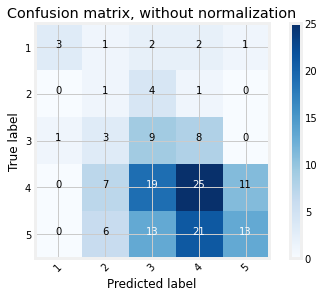

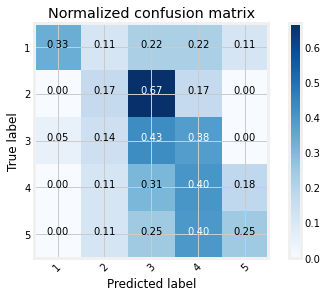

In [54]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Accuracy Score

In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.33774834437086093


### Precision & Recall

In [59]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.43614299592859845
Recall: 0.33774834437086093


### Save the updated predictions

In [ ]:
X_null, X_full_test, y_null, y_full_test = train_test_split(vectors, stars[1], test_size=0.999995, random_state=42, shuffle = False)
predict_all = classifier.predict(X_full_test)

In [ ]:
predict_stars = list(predict_all)
unbiased_reviews_dataset = reviews_dataset

# dropping actual ratings(stars) by user
unbiased_reviews_dataset = unbiased_reviews_dataset.drop('stars_y',1)

# adding the unbiased predicted rating
unbiased_reviews_dataset['stars_y'] = predicted_stars


In [ ]:
# write dataframe to csv
file_name = "reviews_restaurants_predicted.csv"
unbiased_reviews_dataset.to_csv(file_name, encoding='utf-8', index=False)